## Import Library & Evaluate data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
file = 'Life Expectancy.csv'

In [3]:
data = pd.read_csv(file)

In [4]:
#data.head()
data.sample(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1595,Malaysia,2006,Developing,73.6,134.0,3,0.42,365.911398,95.0,564,...,95.0,3.65,95.0,0.1,6222.982955,26143566.0,8.8,8.6,0.732,12.7
2288,Seychelles,2008,Developing,72.2,184.0,0,6.33,701.852636,99.0,0,...,99.0,2.64,99.0,0.1,11122.862700,86956.0,5.9,6.3,0.739,13.2
1096,Guinea-Bissau,2009,Developing,56.3,288.0,4,2.55,47.129693,8.0,0,...,78.0,6.81,8.0,6.0,544.222779,1517448.0,8.3,8.1,0.401,8.9
1902,Nigeria,2006,Developing,49.8,396.0,549,9.66,10.357794,27.0,704,...,46.0,3.66,4.0,5.3,119.743286,14261494.0,12.6,12.6,0.466,9.0
1160,Hungary,2009,Developed,74.2,162.0,0,11.46,1281.155944,NaN,1,...,99.0,7.55,99.0,0.1,12967.165430,12265.0,1.8,1.8,0.816,15.3
2479,Suriname,2009,Developing,70.0,196.0,0,5.13,885.073977,87.0,0,...,85.0,6.14,87.0,0.6,7443.851780,52619.0,3.5,3.4,0.696,12.1
753,Djibouti,2015,Developing,63.5,241.0,1,NaN,0.000000,84.0,47,...,84.0,NaN,84.0,2.1,1862.167274,927414.0,5.6,5.4,0.470,6.3
51,Angola,2012,Developing,56.0,358.0,72,8.24,256.122524,75.0,4458,...,75.0,3.30,75.0,2.6,4598.249988,259615.0,8.8,8.6,0.508,10.3
740,Denmark,2012,Developed,80.0,76.0,0,9.26,928.417079,NaN,2,...,94.0,1.98,94.0,0.1,5857.521000,5591572.0,1.1,0.9,0.922,18.4
1949,Pakistan,2008,Developing,64.6,177.0,369,0.03,5.447134,65.0,1129,...,7.0,3.26,62.0,0.1,139.312880,16364463.0,2.7,21.1,0.513,7.3


In [5]:
data.shape

(2938, 22)

In [6]:
data.Status.value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
drop_col = ['Country', 'Year', 'Status']
data = data.drop(drop_col, axis = 1);

In [9]:
data.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Remove Row which Target Variable is Null

In [10]:
indexNames = data[data['Life expectancy'].isnull()].index
data = data.drop(indexNames)

In [11]:
data.isnull().sum().get('Life expectancy')

0

In [12]:
y = data['Life expectancy']
X_b4clean = data.drop('Life expectancy' , axis = 1)

## Drop Variable that unnecessary

In [13]:
perc_null = []

for column in X_b4clean.columns:
    perc = X_b4clean.isnull().sum().get(column)*100/len(y)
    perc_null.append(perc)

table_pnull = pd.DataFrame()
table_pnull['Column Name'] = X_b4clean.columns
table_pnull['Percentage of Null Value'] = perc_null

# round the percentage to 4 decimal place
table_pnull['Percentage of Null Value'] = table_pnull['Percentage of Null Value'].round(4)

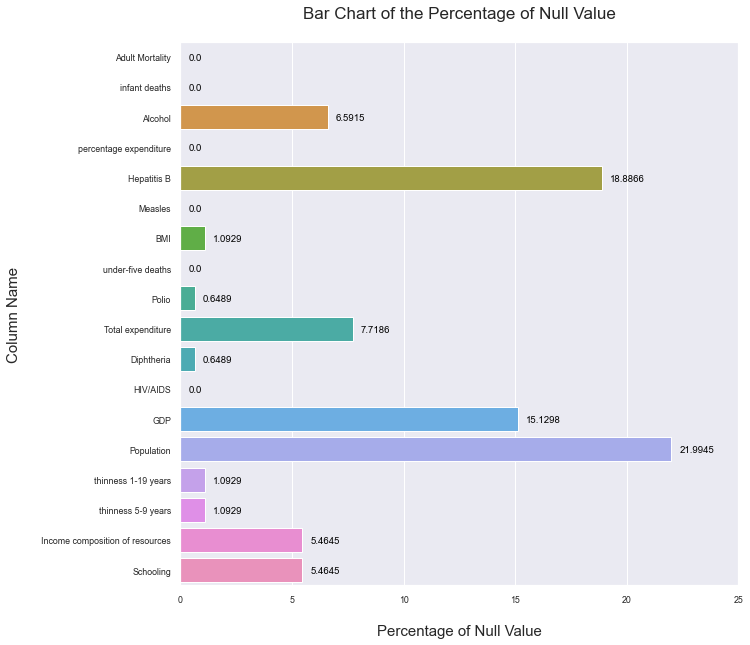

In [14]:
sns.set_style('whitegrid')
sns.set(font_scale = 0.8)
plt.subplots(figsize = (10,10))
plt.title('Bar Chart of the Percentage of Null Value\n', fontsize = 17)
ax = sns.barplot(x = "Percentage of Null Value", y = "Column Name", data = table_pnull)

for i, v in enumerate(table_pnull['Percentage of Null Value']):
    ax.text(v + 0.35, i + 0.1, str(v), color = 'black')

plt.xlabel("Percentage of Null Value", fontsize = 15, labelpad = 20)
plt.ylabel("Column Name", fontsize = 15, labelpad = 20)
plt.xlim([0, 25])
plt.show()

We drop the column with high percentage of null value.

In [15]:
drop_null_high = ['Hepatitis B', 'GDP', 'Population']
X = X_b4clean.drop(drop_null_high, axis = 1)

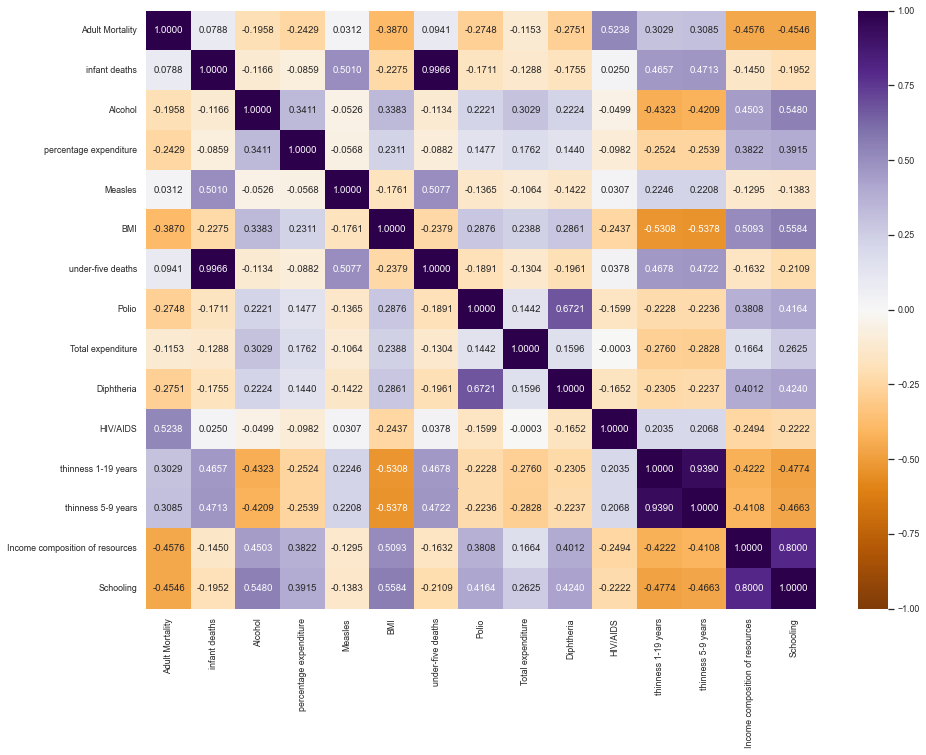

In [16]:
# see the correlation of all the variables
corr_matrix = X.corr('pearson')
plt.subplots(figsize=(15,11))
sns.heatmap(corr_matrix, cmap = 'PuOr', fmt = '.4f', annot = True, vmin = -1, vmax = 1, center = 0);

Three pair of variables need to be evaluated since they're highly correlated:
1. 'infant deaths' & 'under-five deaths'
2. 'thinness  1-19 years' & 'thinness 5-9 years'
3. 'Income composition of resources' & 'Schooling'

In [17]:
drop_one = data[['infant deaths', 'under-five deaths', 'Life expectancy']]
corr_matrix_1 = drop_one.corr('pearson')
corr_matrix_1.iloc[:,[2]]

,Life expectancy
infant deaths,-0.196557
under-five deaths,-0.222529
Life expectancy,1.000000


'under-five deaths' has a higher correlation with our target variable, thus we choose to keep that and drop 'infant deaths'.

In [18]:
drop_one_2 = data[['thinness 1-19 years', 'thinness 5-9 years', 'Life expectancy']]
corr_matrix_2 = drop_one_2.corr('pearson')
corr_matrix_2.iloc[:,[2]]

,Life expectancy
thinness 1-19 years,-0.477183
thinness 5-9 years,-0.471584
Life expectancy,1.000000


'thinness 1-19 years' has a higher correlation with our target variable, thus we choose to keep that and drop 'thinness 5-9 years'.

In [19]:
drop_one_3 = data[['Income composition of resources', 'Schooling', 'Life expectancy']]
corr_matrix_3 = drop_one_3.corr('pearson')
corr_matrix_3.iloc[:,[2]]

,Life expectancy
Income composition of resources,0.724776
Schooling,0.751975
Life expectancy,1.000000


'Schooling' has a higher correlation with our target variable, thus we choose to keep that and drop 'Income composition of resources'.

In [20]:
drop_high_corr = ['infant deaths', 'thinness 5-9 years', 'Income composition of resources']
X = X.drop(drop_high_corr, axis = 1)

Now, the dataset has been reduced to 12 features in total. We may choose a variable from these 12 independent variable.

## Task 1 - Fit the first model ( 1 variable )

In [21]:
col = []

for c in X.columns:
    col.append(c)

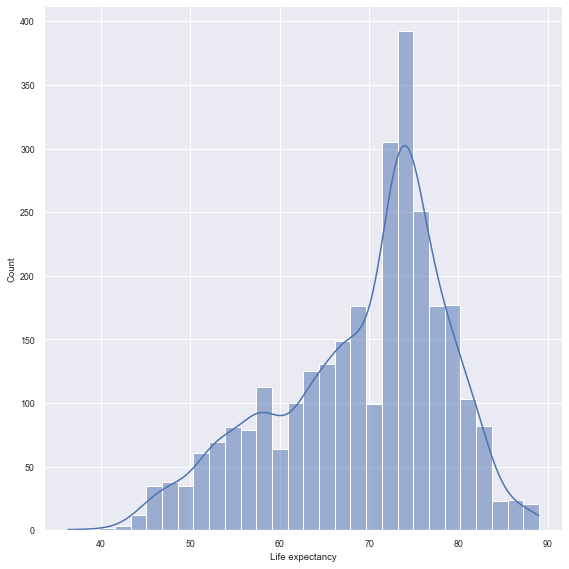

In [22]:
sns.displot(y, kde = True, height = 8, aspect = 1)

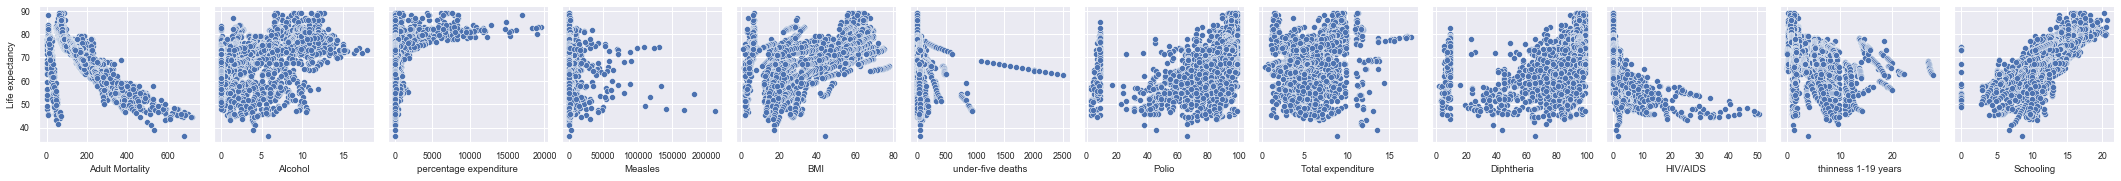

In [23]:
highest_corr = data[col]
highest_corr.insert(12, 'Life expectancy', data['Life expectancy'])
sns.pairplot(data = highest_corr,
             x_vars = data[col],
             y_vars = ['Life expectancy'])

In [24]:
highest_corr = highest_corr.corr('pearson')
highest_corr.iloc[:,[12]]

,Life expectancy
Adult Mortality,-0.696359
Alcohol,0.404877
percentage expenditure,0.381864
Measles,-0.157586
BMI,0.567694
under-five deaths,-0.222529
Polio,0.465556
Total expenditure,0.218086
Diphtheria,0.479495
HIV/AIDS,-0.556556


Text(15.302, 0.5, 'Life expectancy')

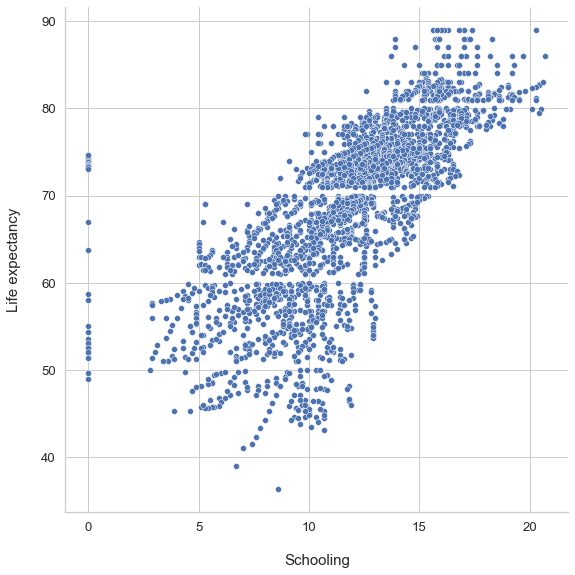

In [25]:
sns.set(font_scale = 1.2)
sns.set_style('whitegrid')
sns.relplot(x = 'Schooling', y = 'Life expectancy', data = data, height = 8, aspect = 1)
plt.xlabel("Schooling", fontsize = 15, labelpad = 20)
plt.ylabel("Life expectancy", fontsize = 15, labelpad = 20)

Choose 'Schooling' variable because the correlation with target variable is the highest among all the other variables.

In [26]:
data_1model = data[['Schooling', 'Life expectancy']]
data_1model = data_1model.dropna(axis = 0)

In [27]:
Q1 = data_1model.quantile(0.25)
Q3 = data_1model.quantile(0.75)

# eliminate outlier for both x and y variable
for var in data_1model.columns:
    Q1_var = Q1.get(var)
    Q3_var = Q3.get(var)
    IQR = Q3_var - Q1_var
    min_ = Q1_var - 1.5 * IQR
    max_ = Q3_var + 1.5 * IQR
    
    indexNames = data_1model[ (data_1model[var] < min_) | (data_1model[var] > max_) ].index
    data_1model = data_1model.drop(indexNames)

In [28]:
x_1model = data_1model.iloc[:,0]
y_1model = data_1model.iloc[:,1]

In [29]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse

x_1model = sm.add_constant(x_1model)
task_1model = sm.OLS(y_1model, x_1model).fit()
y_pred_1 = task_1model.predict(x_1model)

print(task_1model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     4415.
Date:                Wed, 15 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:12:41   Log-Likelihood:                -8446.6
No. Observations:                2700   AIC:                         1.690e+04
Df Residuals:                    2698   BIC:                         1.691e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.7359      0.435     96.034      0.0

In [30]:
rmse_1 = rmse(y_1model, y_pred_1)
print("RMSE = {:0.4f}".format(rmse_1))

RMSE = 5.5258


In [31]:
lr = LinearRegression()
lr.fit(x_1model, y_1model);

In [32]:
print(f"R^2 = {lr.score(x_1model, y_1model)}")
print(f"Intercept = {lr.intercept_}")
print(f"Coefficients = {lr.coef_}")

R^2 = 0.6207110295127878
Intercept = 41.735869186747365
Coefficients = [0.         2.29674023]


In [33]:
task_1model.params

const        41.735869
Schooling     2.296740
dtype: float64

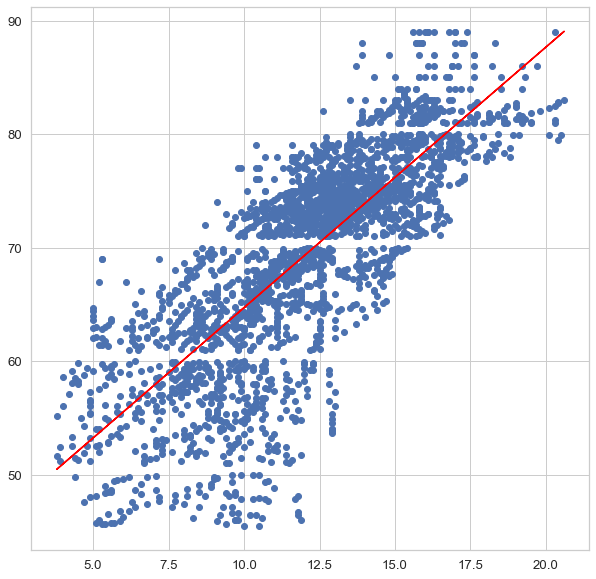

In [34]:
plt.subplots(figsize=(10,10))
plt.scatter(x_1model.iloc[:, 1], y_1model)
plt.plot(x_1model.iloc[:, 1], y_pred_1, color = 'red')
plt.show()

## Task 2 - Choose variable for 2nd & 3rd model

In [35]:
from itertools import combinations

In [36]:
var_size = [2, 3, 4]

for size in var_size:
    combi_final = []
    adjRsquare = []
    i = 0
    combi = list(combinations(col, size))
    
    while i < len(combi):
        if size == 2:
            poss_data = pd.DataFrame(X[[combi[i][0], combi[i][1]]])
        elif size == 3:
            poss_data = pd.DataFrame(X[[combi[i][0], combi[i][1], combi[i][2]]])
        else:
            poss_data = pd.DataFrame(X[[combi[i][0], combi[i][1], combi[i][2], combi[i][3]]])
        
        poss_data = pd.concat([poss_data, y], axis = 1)
        poss_data = poss_data.dropna(axis = 0)
    
        Q1 = poss_data.quantile(0.25)
        Q3 = poss_data.quantile(0.75)
    
        # eliminate outlier for both x and y variable
        for var in poss_data.columns:
            Q1_var = Q1.get(var)
            Q3_var = Q3.get(var)
            IQR = Q3_var - Q1_var
            min_ = Q1_var - 1.5 * IQR
            max_ = Q3_var + 1.5 * IQR
    
            indexNames = poss_data[ (poss_data[var] < min_) | (poss_data[var] > max_) ].index
            poss_data = poss_data.drop(indexNames)
    
        poss_x = poss_data.drop('Life expectancy', axis = 1)
        poss_y = poss_data['Life expectancy']
    
        poss_x = sm.add_constant(poss_x)
        poss_model = sm.OLS(poss_y, poss_x).fit()
    
        #print("R-squared       = {:0.4f}".format(poss_model.rsquared))
        #print("Adj. R-squared  = {:0.4f}\n".format(poss_model.rsquared_adj))
        
        i = i + 1
        
        # to avoid multicollinearity to high (independent variabel x has high correlation with each other)
        if poss_model.condition_number > 1000:
            continue
        
        adjRsquare.append(poss_model.rsquared_adj)
        #print(combi[i-1])
        combi_final.append(combi[i-1])
        #print(len(combi_final))
        
    combi_final = pd.DataFrame(combi_final)
    adjRsquare = pd.DataFrame(adjRsquare)
    feature_score = pd.concat([combi_final, adjRsquare], axis = 1)
    
    if size == 2:
        feature_score.columns = ['First Feature', 'Second Feature', 'Adj. R-Squared']
        var2_score = feature_score
    elif size == 3:
        feature_score.columns = ['First Feature', 'Second Feature', 'Third Feature', 'Adj. R-Squared']
        var3_score = feature_score
    else:
        feature_score.columns = ['First Feature', 'Second Feature', 'Third Feature', 'Forth Feature', 'Adj. R-Squared']
        var4_score = feature_score

In [37]:
var2_score.nlargest(5, 'Adj. R-Squared')

,First Feature,Second Feature,Adj. R-Squared
55,HIV/AIDS,Schooling,0.646518
56,thinness 1-19 years,Schooling,0.643987
36,BMI,Schooling,0.635057
46,Polio,Schooling,0.625129
17,Alcohol,Schooling,0.621255


In [38]:
var3_score.nlargest(5, 'Adj. R-Squared')

,First Feature,Second Feature,Third Feature,Adj. R-Squared
117,Polio,thinness 1-19 years,Schooling,0.653014
99,BMI,thinness 1-19 years,Schooling,0.652486
63,Alcohol,thinness 1-19 years,Schooling,0.649733
90,BMI,Polio,Schooling,0.643893
125,Diphtheria,HIV/AIDS,Schooling,0.643837


In [39]:
var4_score.nlargest(5, 'Adj. R-Squared')

,First Feature,Second Feature,Third Feature,Forth Feature,Adj. R-Squared
17,Adult Mortality,Alcohol,HIV/AIDS,thinness 1-19 years,0.661031
123,BMI,Polio,thinness 1-19 years,Schooling,0.659938
74,Alcohol,BMI,thinness 1-19 years,Schooling,0.656942
90,Alcohol,Polio,thinness 1-19 years,Schooling,0.653788
10,Adult Mortality,Alcohol,BMI,HIV/AIDS,0.653179


By comparing the adjusted R-squared of the above three tables, the features that give the highest score is
1. Adult Mortality & Alcohol & HIV/AIDS & thinness 1-19 years
2. BMI & Polio & thinness 1-19 years & Schooling

## Task 2 - Fit the second model ( 4 variable )

In [40]:
#data_2model = data[['Adult Mortality', 'Polio', 'thinness 1-19 years', 'Schooling', 'Life expectancy']]

# when condition number not too high, the best model
data_2model = data[['Adult Mortality', 'Alcohol', 'HIV/AIDS', 'thinness 1-19 years', 'Life expectancy']]
data_2model = data_2model.dropna(axis = 0)

In [41]:
Q1 = data_2model.quantile(0.25)
Q3 = data_2model.quantile(0.75)

# eliminate outlier for both x and y variable
for var in data_2model.columns:
    Q1_var = Q1.get(var)
    Q3_var = Q3.get(var)
    IQR = Q3_var - Q1_var
    min_ = Q1_var - 1.5 * IQR
    max_ = Q3_var + 1.5 * IQR
    
    indexNames = data_2model[ (data_2model[var] < min_) | (data_2model[var] > max_) ].index
    data_2model = data_2model.drop(indexNames)

In [42]:
x_2model = data_2model.drop('Life expectancy', axis = 1)
y_2model = data_2model['Life expectancy']

In [43]:
x_2model = sm.add_constant(x_2model)
task_2model = sm.OLS(y_2model, x_2model).fit()
y_pred_2 = task_2model.predict(x_2model)

print(task_2model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     1038.
Date:                Wed, 15 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:13:08   Log-Likelihood:                -5892.7
No. Observations:                2129   AIC:                         1.180e+04
Df Residuals:                    2124   BIC:                         1.182e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  77.8002    

In [44]:
rmse_2 = rmse(y_2model, y_pred_2)
print("RMSE = {:0.4f}".format(rmse_2))

RMSE = 3.8532


## Task 2 - Fit the thirt model ( 4 variable )

In [45]:
#data_3model = data[['Adult Mortality', 'BMI', 'Polio', 'Schooling', 'Life expectancy']]
data_3model = data[['BMI', 'Polio', 'thinness 1-19 years', 'Schooling', 'Life expectancy']]
data_3model = data_3model.dropna(axis = 0)

In [46]:
Q1 = data_3model.quantile(0.25)
Q3 = data_3model.quantile(0.75)

# eliminate outlier for both x and y variable
for var in data_3model.columns:
    Q1_var = Q1.get(var)
    Q3_var = Q3.get(var)
    IQR = Q3_var - Q1_var
    min_ = Q1_var - 1.5 * IQR
    max_ = Q3_var + 1.5 * IQR
    
    indexNames = data_3model[ (data_3model[var] < min_) | (data_3model[var] > max_) ].index
    data_3model = data_3model.drop(indexNames)

In [47]:
x_3model = data_3model.drop('Life expectancy', axis = 1)
y_3model = data_3model['Life expectancy']

In [48]:
x_3model = sm.add_constant(x_3model)
task_3model = sm.OLS(y_3model, x_3model).fit()
y_pred_3 = task_3model.predict(x_3model)

print(task_3model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1140.
Date:                Wed, 15 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:13:08   Log-Likelihood:                -7064.3
No. Observations:                2349   AIC:                         1.414e+04
Df Residuals:                    2344   BIC:                         1.417e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  36.7246    

In [49]:
rmse_3 = rmse(y_3model, y_pred_3)
print("RMSE = {:0.4f}".format(rmse_3))

RMSE = 4.8961


## Task 3 - Compare 3 model

In [50]:
adjR2 = [task_1model.rsquared_adj, task_2model.rsquared_adj, task_3model.rsquared_adj]
rmse = [rmse_1, rmse_2, rmse_3]
col_name = ['1', '2', '3']

In [51]:
# to set label
def set_label(ax):
    rects = ax.patches
    for rect in rects:
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2
        space = 10
        ha = 'left'
        label = '{:,.4f}'.format(x_value)
        plt.annotate(
            label,                      
            (x_value, y_value),         
            xytext = (space, -4),          
            textcoords = 'offset points',
            va = 'center',                
            ha = ha)

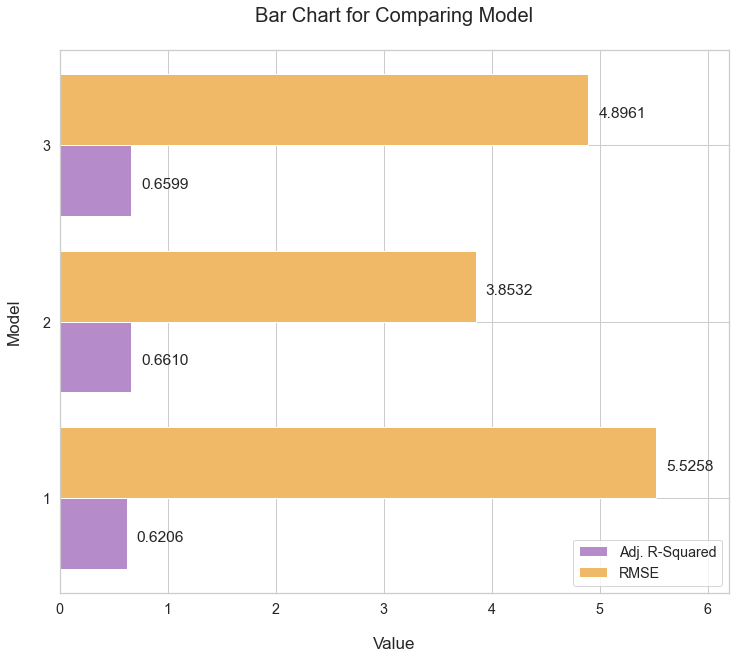

In [53]:
sns.set(font_scale = 1.3)
sns.set_style("whitegrid")
plt.subplots(figsize = (12, 10))
plt.title('Bar Chart for Comparing Model\n', fontsize = 20)

Y_axis = np.arange(len(col_name))

ax = plt.barh(Y_axis - 0.2, adjR2, 0.4, color = '#b58bc9', label = 'Adj. R-Squared')
set_label(ax)
ax = plt.barh(Y_axis + 0.2, rmse, 0.4, color = '#f0b967', label = 'RMSE')
set_label(ax)
    
plt.yticks(Y_axis, col_name)
plt.xlabel("Value", fontsize = 17, labelpad = 20)
plt.ylabel("Model", fontsize = 17, labelpad = 20)
plt.xlim([0, 6.2])
plt.legend()
plt.show()

## Task 4 - Prediction Interval

In [54]:
# choose x variable using measures of central tendency (mean)

x1 = data_2model['Adult Mortality'].mean()
x2 = data_2model['Alcohol'].mean()
x3 = data_2model['HIV/AIDS'].mean()
x4 = data_2model['thinness 1-19 years'].mean()

x_variable = [1, x1, x2, x3, x4]
# 1 is for the B0 (const)

In [55]:
prediction = task_2model.get_prediction(pd.DataFrame([x_variable]))
ci = prediction.summary_frame(alpha = 0.05)

print("The choosen set of X values:")
print("x1 - Adult Mortality     = {:0.4f}".format(x1))
print("x2 - Alcohol             = {:0.4f}".format(x2))
print("x3 - HIV/AIDS            = {:0.4f}".format(x3))
print("x4 - thinness 1-19 years = {:0.4f}\n".format(x4))

print("The upper confidence limit of life expectancy is = {:0.4f} years old".format(ci.obs_ci_upper[0]))
print("The lower confidence limit of life expectancy is = {:0.4f} years old".format(ci.obs_ci_lower[0]))

The choosen set of X values:
x1 - Adult Mortality     = 129.4814
x2 - Alcohol             = 5.0305
x3 - HIV/AIDS            = 0.2409
x4 - thinness 1-19 years = 3.6882

The upper confidence limit of life expectancy is = 80.3664 years old
The lower confidence limit of life expectancy is = 65.2323 years old


## Testing